# **Data Analysis Capstone Project - Univelcity Bootcamp**
### Name of student: Ferdinand Tom-Eshemogie

## About this Dataset: 
This Dataset describes the transaction operations of a particular financial institution between the years 2019 -2020. This Dataset has 6 features about each transaction made by a specific account number, and there are 513247 entries.

### Description of the variables in the Dataset:

* **acct_no**: Identifies each account number.
* **txnYear**(Date): The year of a transaction.
* **txnMonth**(Date): The month of a transaction.
* **txnDay**(Date): The day of a transaction.
* **status**: The transaction's status, whether or not it was successful, failed, initialized, declined, pending or debited.
* **no of txns**: The number of transactions made by a particular account number on a specific day.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/drizzytom/Documents/PHYTHON/Data_Sci/txn_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513247 entries, 0 to 513246
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  513247 non-null  int64 
 1   acct_no     513247 non-null  object
 2   txnYear     513247 non-null  int64 
 3   txnMonth    513247 non-null  int64 
 4   txnDay      513247 non-null  int64 
 5   status      513247 non-null  object
 6   no of txns  513247 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 27.4+ MB


In [4]:
df.head()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,0,1001192k,2019,10,29,successful,1
1,1,1001192k,2019,11,12,failed,2
2,2,1001192k,2019,11,18,failed,1
3,3,1001192k,2019,11,27,successful,1
4,4,1001192k,2019,12,8,failed,1


## Data Wrangling:
After viewing the datatypes, Non-null count and some parts of the dataset, The "Unnamed: 0" feature will be dropped because it's not needed for the analysis, and the data type of the txnYear, txnMonth, txnDay columns will be changed to a DateTime object. I will combine the three columns(txnYear, txnMonth, txnDay) to be one date column.

txnYear, txnMonth, and txnDay has to be changed to object so I can work with the features as Date.

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [6]:
df['txnYear'] = df['txnYear'].astype('object')
df['txnMonth'] = df['txnMonth'].astype('object')
df['txnDay'] = df['txnDay'].astype('object')

In [7]:
df.dtypes

acct_no       object
txnYear       object
txnMonth      object
txnDay        object
status        object
no of txns     int64
dtype: object

In [8]:
df[df['txnYear'] == 2019]['txnMonth'].unique()

array([10, 11, 12, 9, 5, 6, 7, 8], dtype=object)

In [9]:
df[df['txnYear'] == 2020]['txnMonth'].unique()

array([2, 3, 4, 5, 6, 7, 9, 10, 11, 1, 8], dtype=object)

I had to split the dataset between the transaction years. I observed from the cells above that 2019 had only transactions for May - December, while 2020 had dealings from January - November. I didn't want to combine both years because records for some months for each year were not available, so combining the data might lead to erroneous conclusions. Secondly, analysis for each year will unlock differences, similarities, and insights between transactions of the different years, which will guide the firm to determine KPIs and improve where necessary.

In [10]:
df_19 = df[df['txnYear'] == 2019] #Transactions for 2019
df_20 = df[df['txnYear'] == 2020] #Transactions for 2020

In [11]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151583 entries, 0 to 513179
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   acct_no     151583 non-null  object
 1   txnYear     151583 non-null  object
 2   txnMonth    151583 non-null  object
 3   txnDay      151583 non-null  object
 4   status      151583 non-null  object
 5   no of txns  151583 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 8.1+ MB


## Descriptive Summary for 2019 Data

In [12]:
df_19.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
acct_no,151583,3604,4203382q,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txnYear,151583.0,1.0,2019.0,151583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txnMonth,151583.0,8.0,11.0,24941.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txnDay,151583.0,31.0,23.0,6112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,151583,6,successful,131974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no of txns,151583.0,NaN,NaN,NaN,1.990626,2.970844,1.0,1.0,1.0,2.0,125.0


## Descriptive Summary for 2020 Data

In [13]:
df_20.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
acct_no,361664,7038,4203382q,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txnYear,361664.0,1.0,2020.0,361664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txnMonth,361664.0,11.0,10.0,80973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txnDay,361664.0,31.0,3.0,15068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,361664,6,successful,341077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no of txns,361664.0,NaN,NaN,NaN,2.587164,11.100839,1.0,1.0,1.0,3.0,1249.0


>**Right off the bat**<br>
According to the summary above, 2020 had more transactions('no of txns') probably because it had more data entry than 2019. 2020 also had an increase in unique account holders('acct_no') with over 3,434 new account numbers. Account Number '4203382q' had the highest number of transactions for both years. An average number of at least 3 transactions per day for both years, but 2020 had a standard deviation of 11 compared to 2019 that has a STD of 3.

In [14]:
##Function to combine three columns as one to form a date format(YY-MM-DD)
def create_date(year, mon, day):
    return str(year) + "/" + str(mon) + "/" + str(day)

In [15]:
import warnings

warnings.filterwarnings('ignore')

### Combining 'txnYear', 'txnMonth', 'txnDay' columns to form a Date format column.

In [16]:
df_19['Date'] = df_19[['txnYear', 'txnMonth', 'txnDay']].apply(lambda x: create_date(x['txnYear'], x['txnMonth'], x['txnDay']), axis = 1)

df_19['Date']= pd.to_datetime(df_19['Date'])

df_19.drop(['txnYear', 'txnMonth', 'txnDay'], axis = 1, inplace = True)

In [17]:
df_20['Date'] = df_20[['txnYear', 'txnMonth', 'txnDay']].apply(lambda x: create_date(x['txnYear'], x['txnMonth'], x['txnDay']), axis = 1)

df_20['Date']= pd.to_datetime(df_20['Date'])

df_20.drop(['txnYear', 'txnMonth', 'txnDay'], axis = 1, inplace = True)

In [18]:
df_20.head()

,acct_no,status,no of txns,Date
7,1001192k,successful,1,2020-02-06
8,1001192k,successful,1,2020-03-08
9,1001192k,successful,1,2020-03-10
10,1001192k,successful,1,2020-03-17
11,1001192k,successful,2,2020-03-25


In [19]:
df_19.head()

,acct_no,status,no of txns,Date
0,1001192k,successful,1,2019-10-29
1,1001192k,failed,2,2019-11-12
2,1001192k,failed,1,2019-11-18
3,1001192k,successful,1,2019-11-27
4,1001192k,failed,1,2019-12-08


In [20]:
df_19.dtypes

acct_no               object
status                object
no of txns             int64
Date          datetime64[ns]
dtype: object

In [21]:
df_20.dtypes

acct_no               object
status                object
no of txns             int64
Date          datetime64[ns]
dtype: object

## Flow of the transactions per month for 2019

*The month of October had the highest number of transactions while May had the lowest number transactions. It will be worth investigating a sharp decline of transactions for the month of September and December*

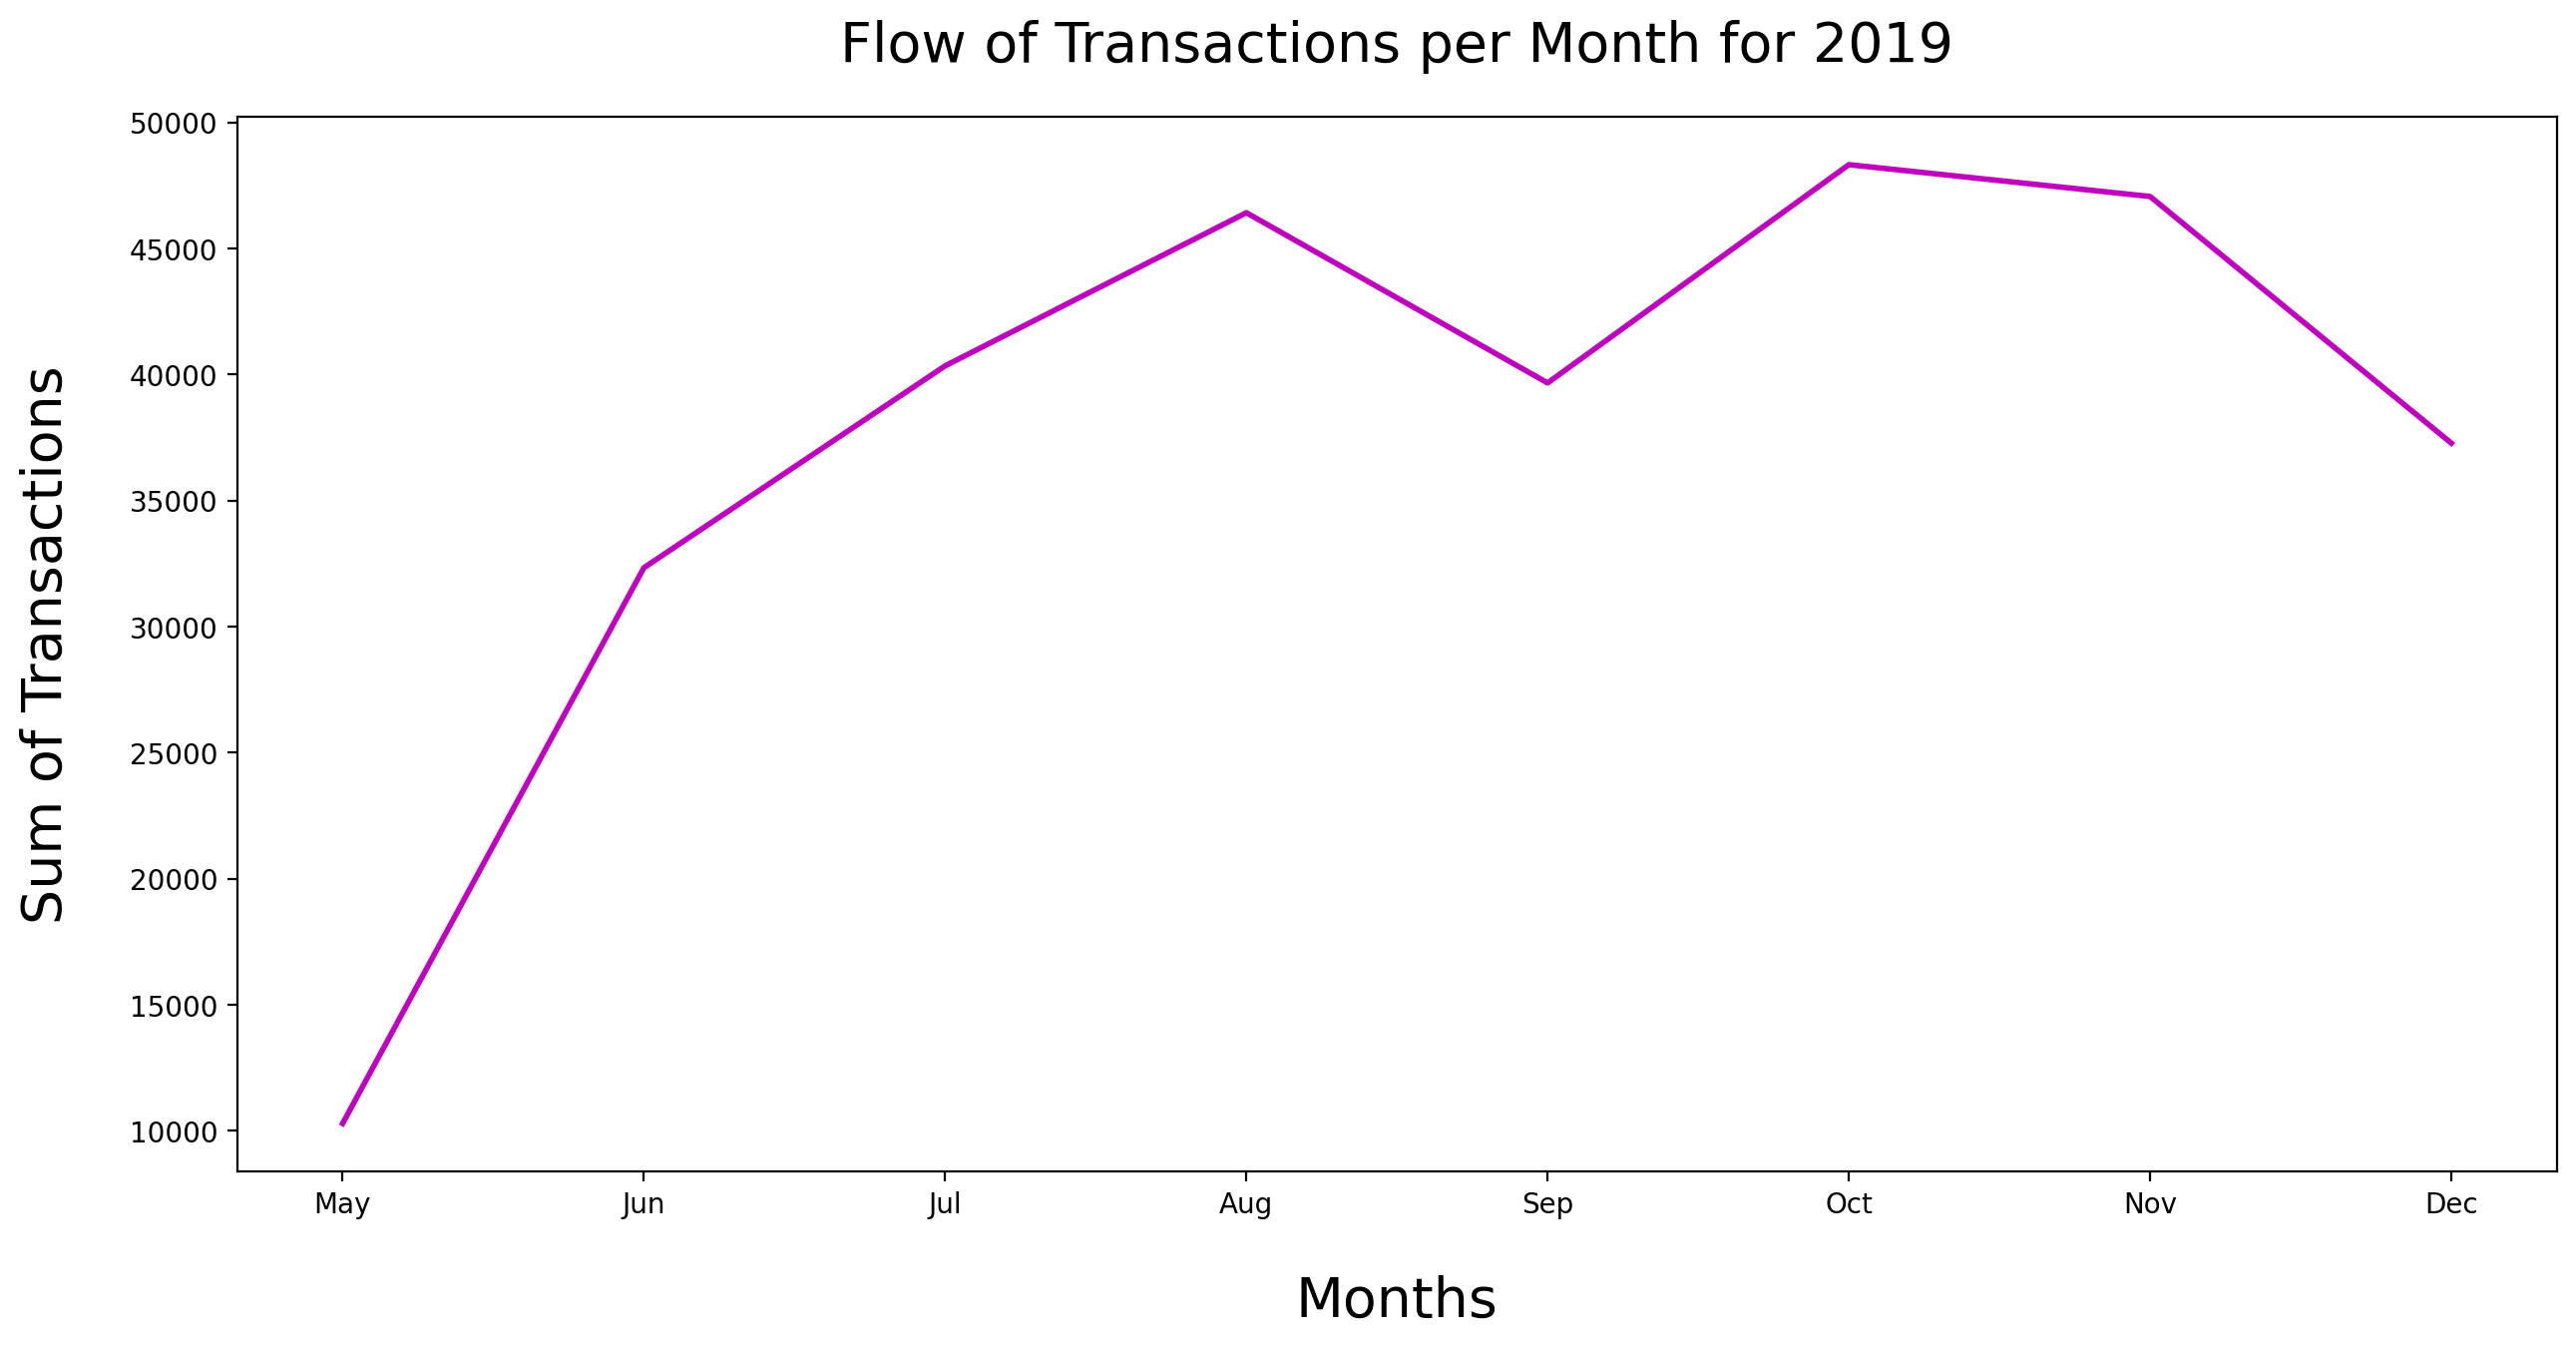

In [22]:
txns_month_19= df_19[['no of txns','Date']].groupby(df_19['Date'].dt.strftime('%b')).sum() 
txns_month_19.reset_index(inplace = True)
txns_month_19['Date'] = txns_month_19['Date'].apply(lambda x: dt.strptime(x, "%b"))
txns_month_19.sort_values(by = 'Date', inplace = True)
txns_month_19['Month'] = txns_month_19['Date'].apply(lambda x: x.strftime("%b"))
txns_month_19.drop('Date', axis = 1, inplace = True)


## Plot the flow of transactions
plt.figure(figsize = (15, 7), dpi =200)
plt.plot(txns_month_19['Month'], txns_month_19['no of txns'], lw = 2,color = 'm')
plt.title("Flow of Transactions per Month for 2019", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Sum of Transactions" , labelpad = 20, size = 20)
plt.show()

In [23]:
txns_month_19.rename(columns={'no of txns': 'Sum of Txns-19'}, inplace = True)

## Flow of Transactions per month for 2020

*The month of October for 2020 also had the highest number transactions, but as seen in the flow below there was an abnormal increase in transactions in the month of September and October*

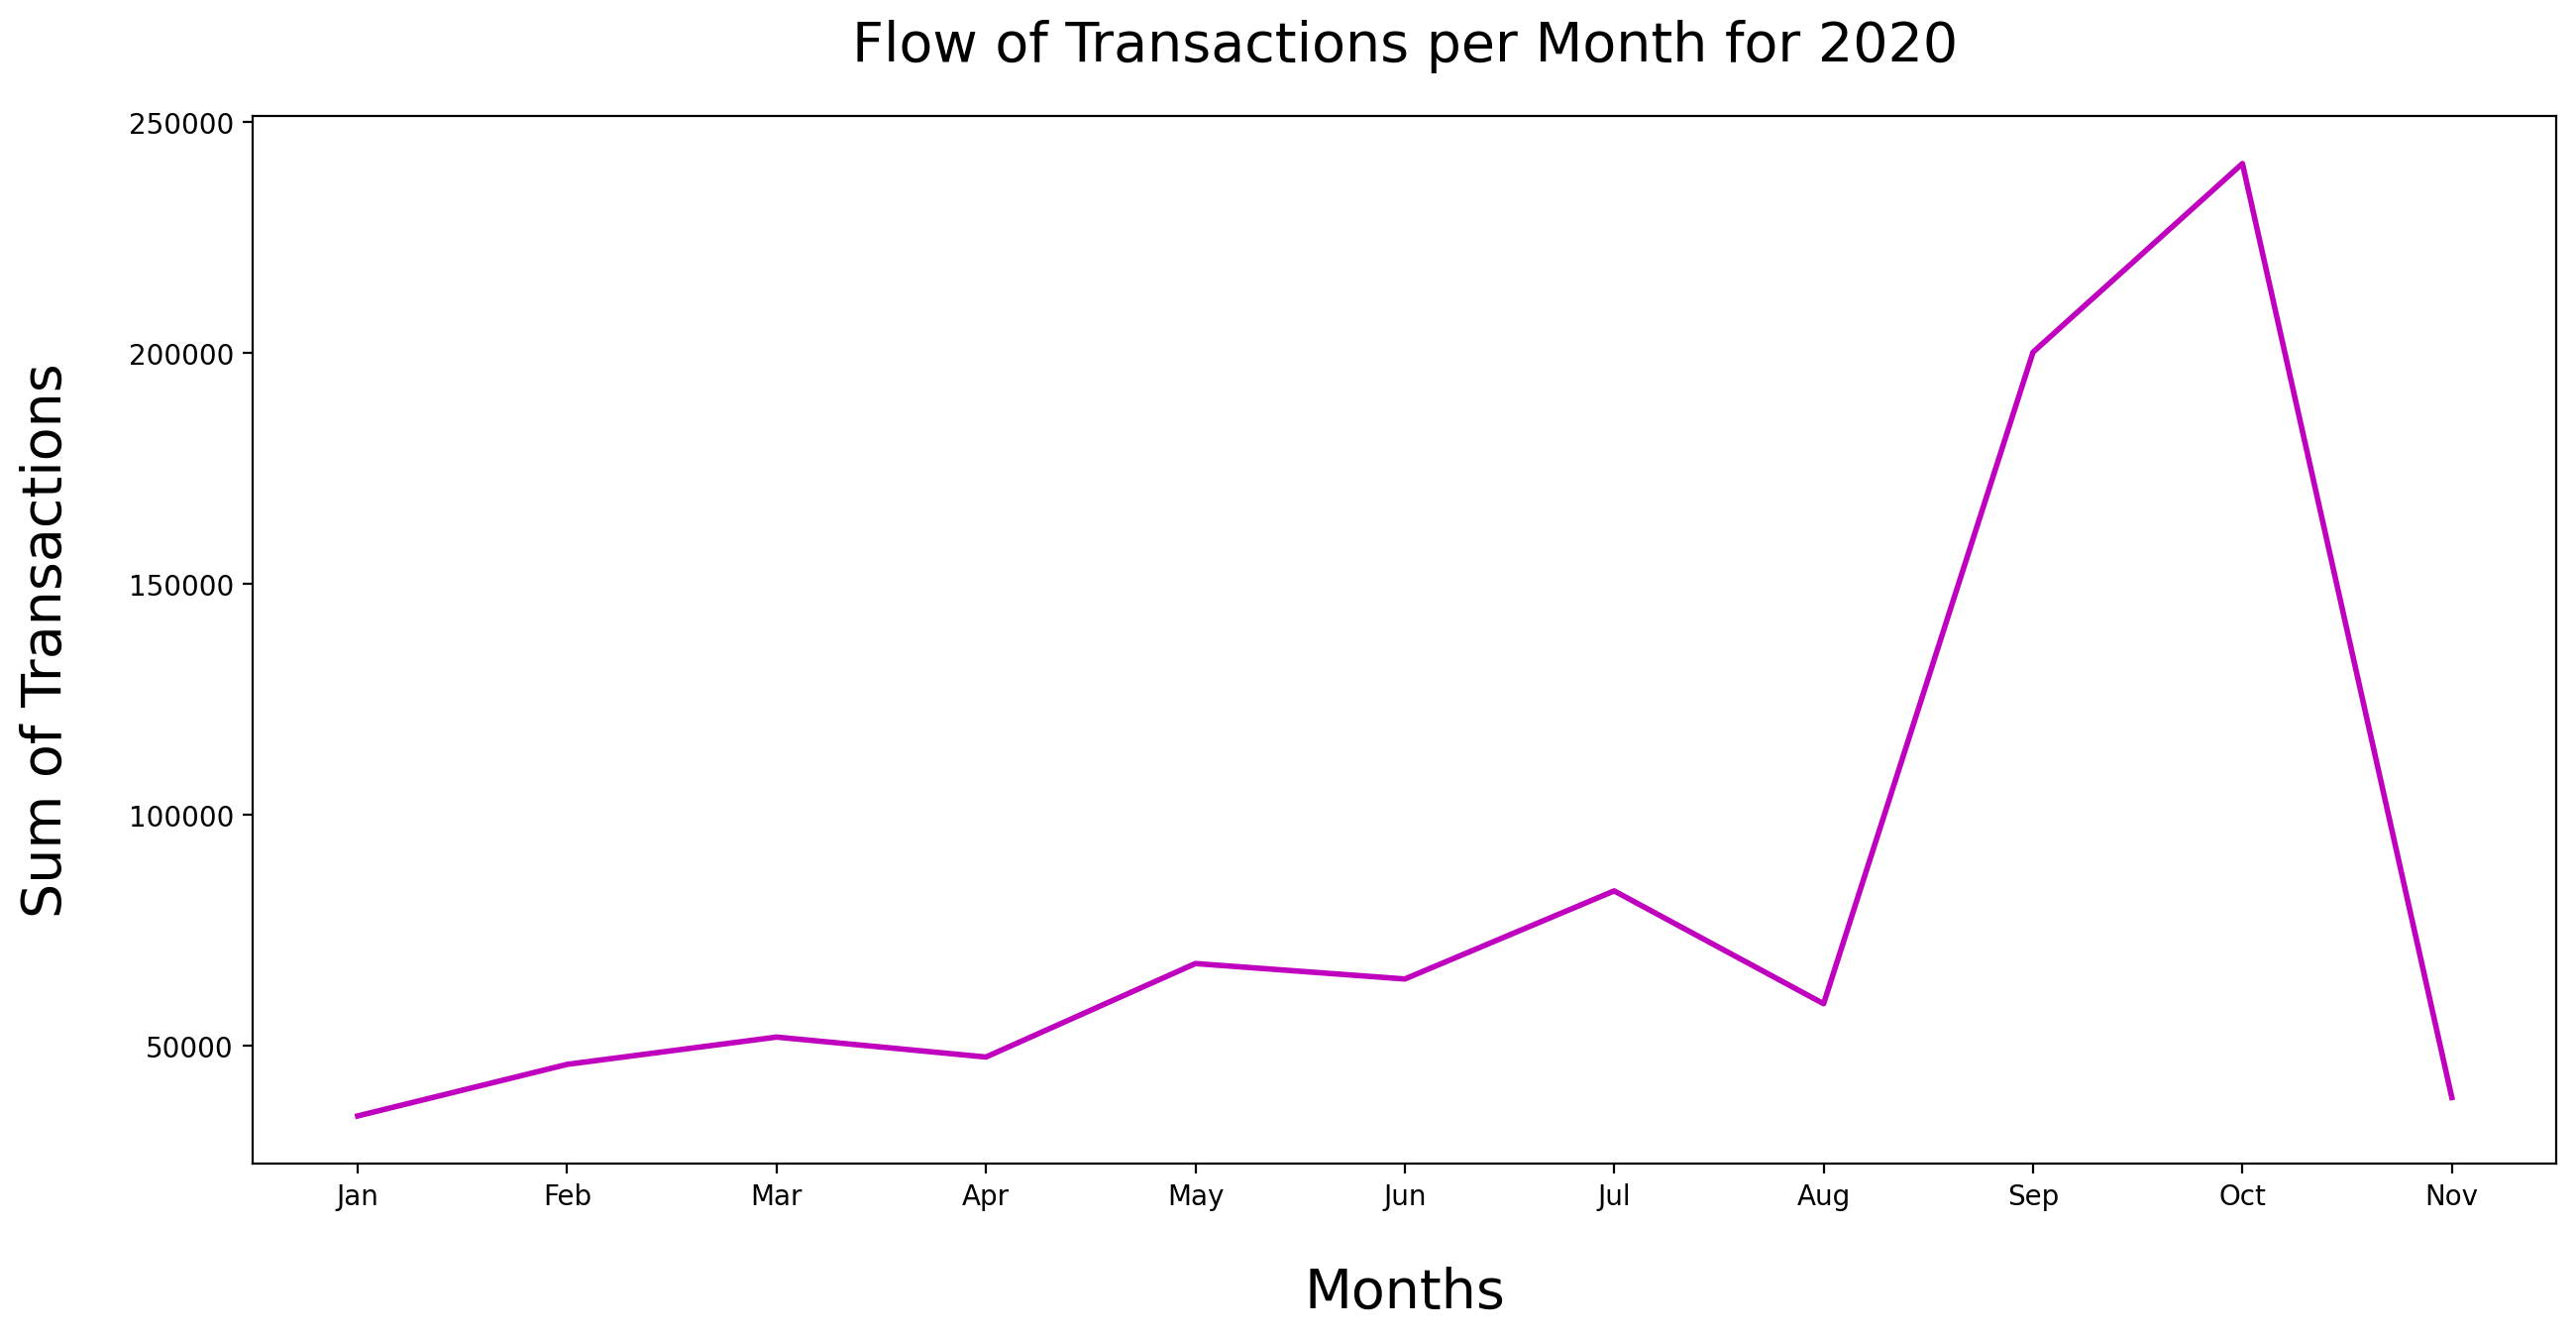

In [24]:
txns_month_20= df_20[['no of txns','Date']].groupby(df_20['Date'].dt.strftime('%b')).sum() 
txns_month_20.reset_index(inplace = True)
txns_month_20['Date'] = txns_month_20['Date'].apply(lambda x: dt.strptime(x, "%b"))
txns_month_20.sort_values(by = 'Date', inplace = True)
txns_month_20['Month'] = txns_month_20['Date'].apply(lambda x: x.strftime("%b"))
txns_month_20.drop('Date', axis = 1, inplace = True)


## Plot the flow of transactions
plt.figure(figsize = (15, 7), dpi =200)
plt.plot(txns_month_20['Month'], txns_month_20['no of txns'], lw = 2,color = 'm')
plt.title("Flow of Transactions per Month for 2020", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Sum of Transactions" , labelpad = 20, size = 20)
plt.show()

# Comparing the flow of Transactions between 2019 and 2020

In [25]:
txns_month_20.rename(columns={'no of txns': 'Sum of Txns-20'}, inplace = True)

compare_yrs = pd.merge(txns_month_20, txns_month_19, on = 'Month', how = 'inner')

In [26]:
def cal_percent(new, old):
    '''This function calculates the percentage increase/decrease in transactions between 2020 and 2019'''
    percent_increase = ((new - old)/old)*100
    return percent_increase

compare_yrs['Percent Increase'] = compare_yrs[['Sum of Txns-20', 'Sum of Txns-19']].apply(lambda x : cal_percent(x['Sum of Txns-20'], x['Sum of Txns-19']), axis = 1)

In [27]:
compare_yrs

,Sum of Txns-20,Month,Sum of Txns-19,Percent Increase
0,67864,May,10297,559.065747
1,64521,Jun,32338,99.520688
2,83585,Jul,40347,107.165341
3,59166,Aug,46421,27.455247
4,200178,Sep,39670,404.608016
5,240997,Oct,48327,398.679827
6,38869,Nov,47065,-17.414214


**2020 evidently had an increase in transactions, except for november**

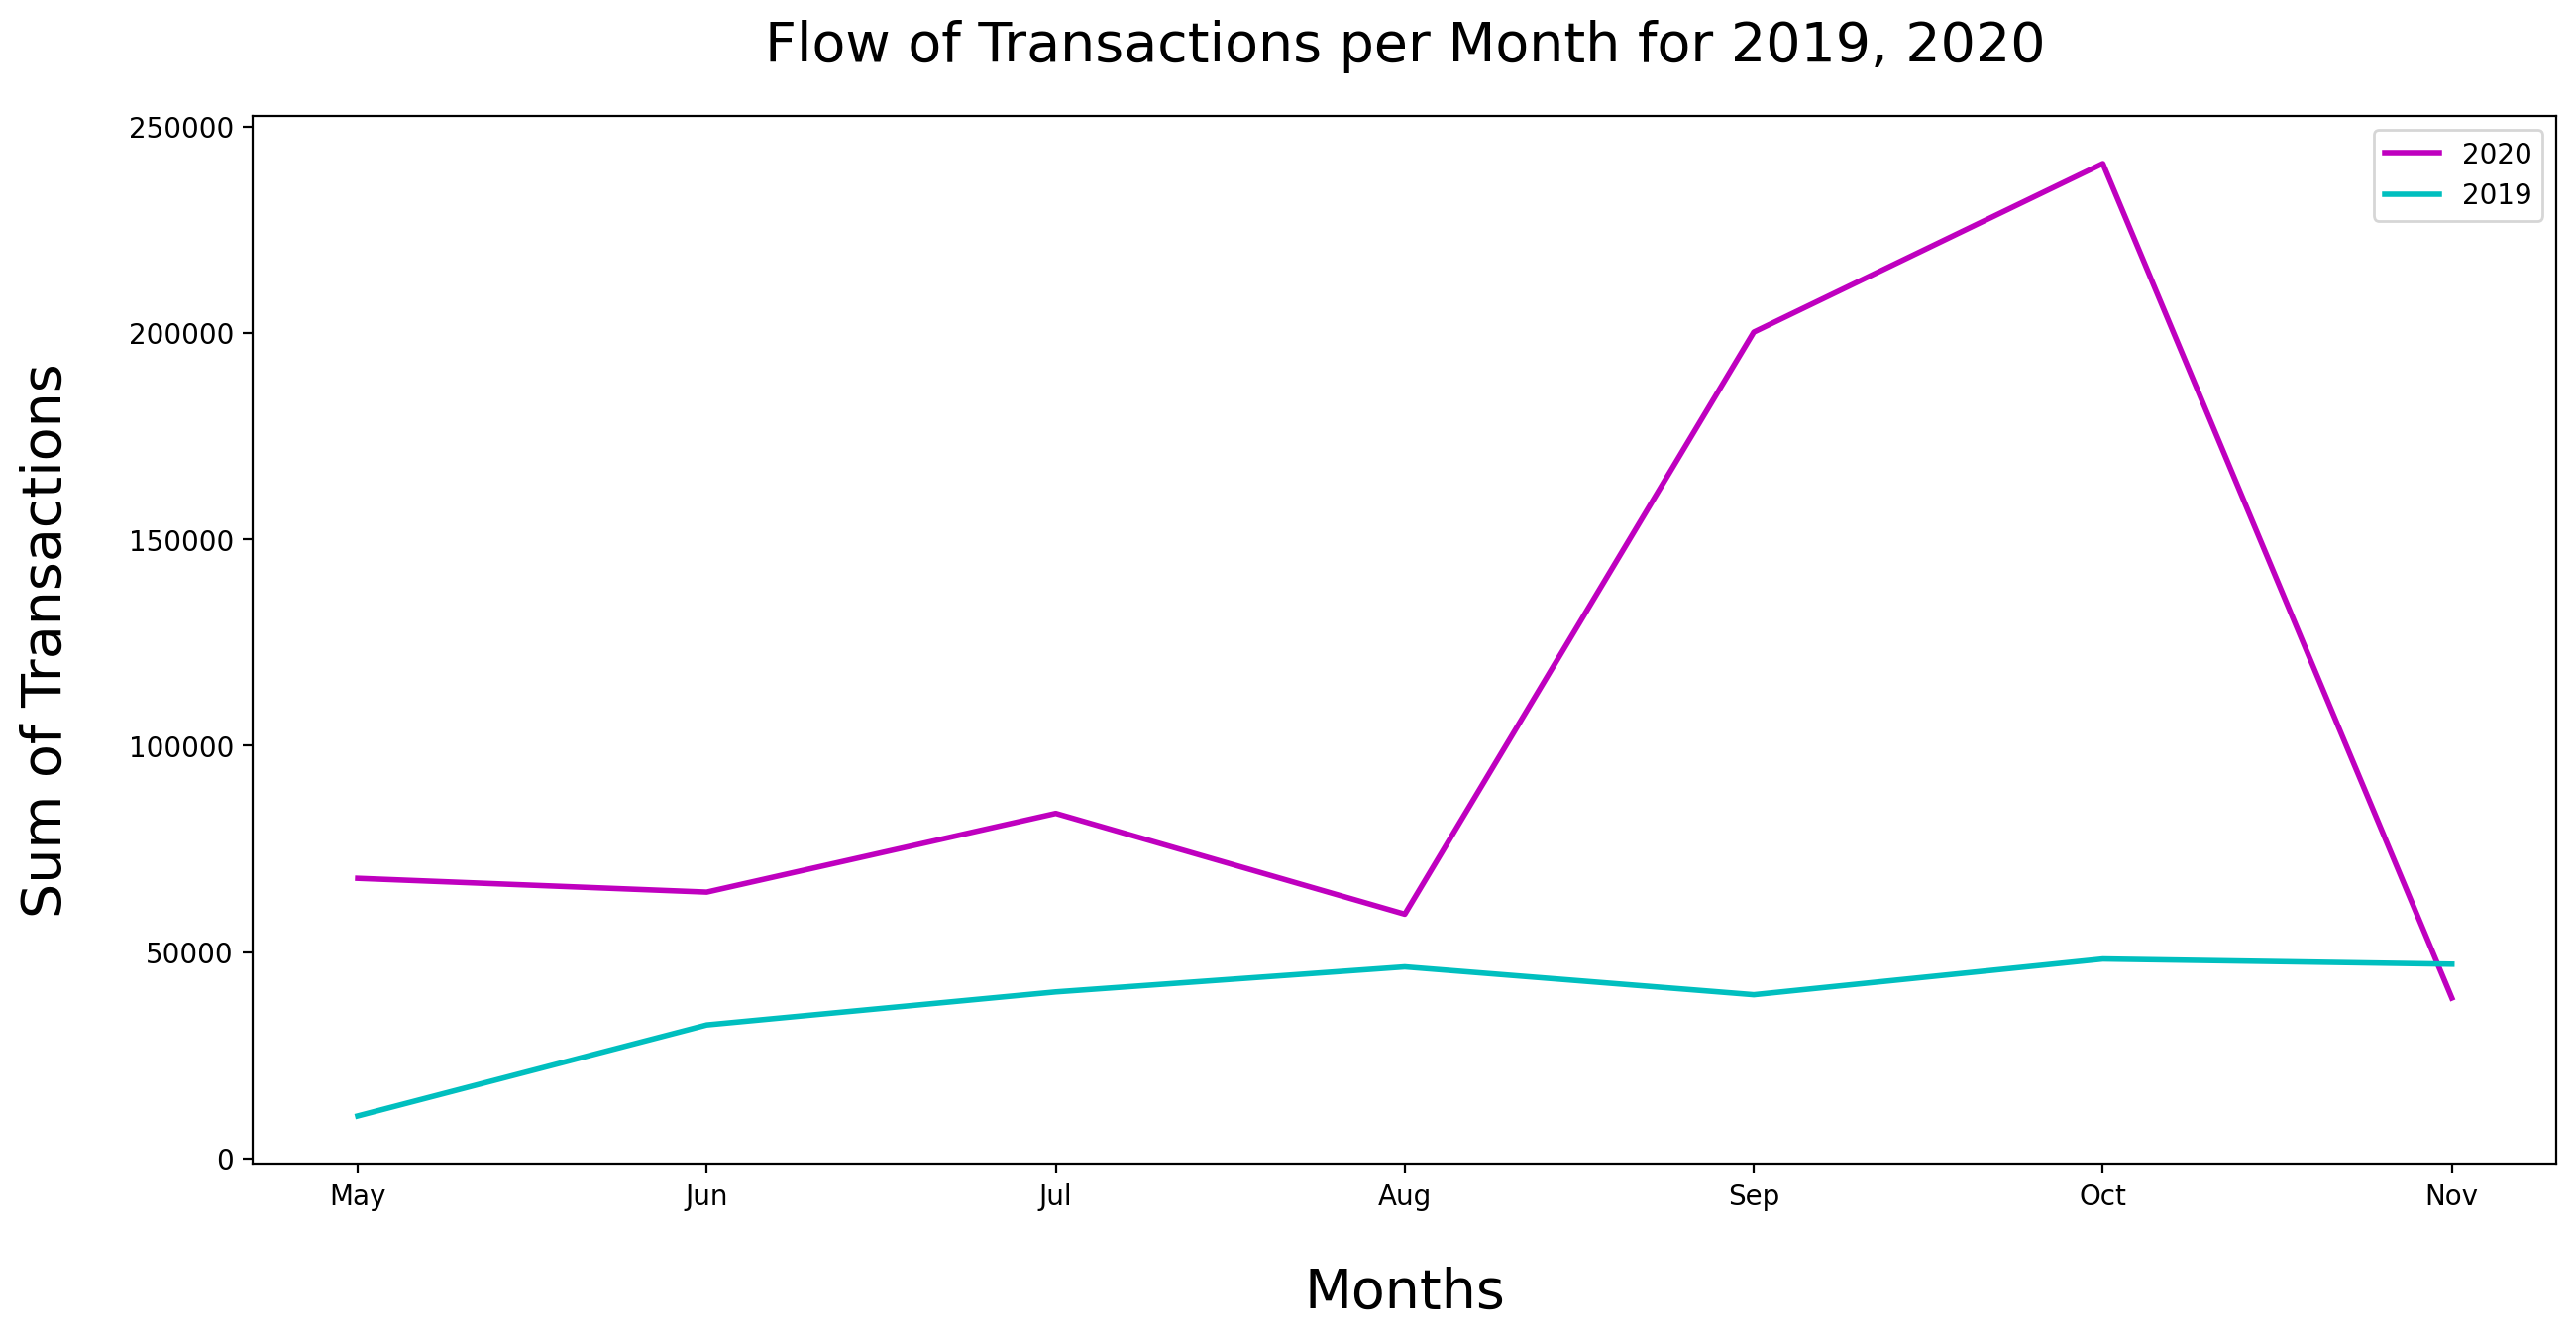

In [28]:
plt.figure(figsize = (15, 7), dpi = 200)

plt.plot(compare_yrs['Month'],compare_yrs['Sum of Txns-20'],  lw = 2,color = 'm', label = 2020)
plt.plot(compare_yrs['Month'],compare_yrs['Sum of Txns-19'],  lw = 2,color = 'c', label = 2019)
plt.title("Flow of Transactions per Month for 2019, 2020", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Sum of Transactions" , labelpad = 20, size = 20)
plt.legend(loc = 'best')
plt.show()

# Investigating 'Successful' and 'Failed' Transaction Status 2019

In [29]:
status_count_19 = df_19['status'].value_counts().to_frame()
status_count_19['status_percentage'] = status_count_19['status'].apply(lambda x : (x/sum(status_count_19['status'].values)*100))
status_count_19.rename(columns = {'status': 'status_count'}, inplace = True)
status_count_19

,status_count,status_percentage
successful,131974,87.063853
failed,15621,10.305245
declined,3451,2.276641
initialized,465,0.306763
pending,42,0.027708
debited,30,0.019791


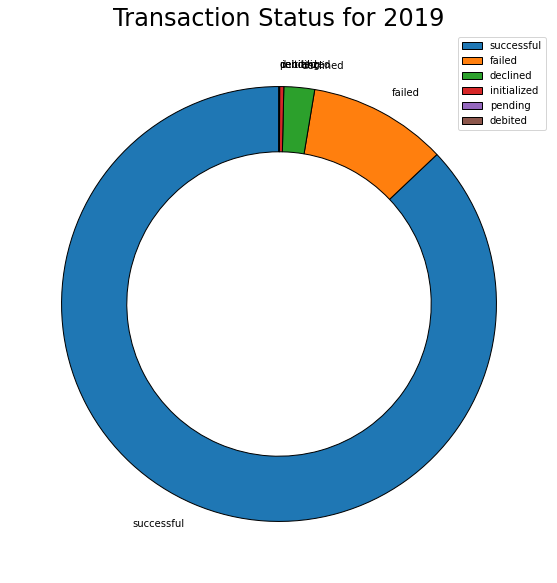

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1.0}
ax.pie(status_count_19['status_percentage'], wedgeprops=wedgeprops, startangle=90, labels = status_count_19.index)
plt.legend(loc = 'best')
plt.title('Transaction Status for 2019', fontsize=24, loc='center')
plt.show()

In [31]:
status_df_19 = df_19.loc[df_19['status'].isin(['successful', 'failed'])]

In [32]:
dummy_df_19 = pd.get_dummies(status_df_19['status'])
dummy_df_19 = pd.concat([status_df_19, dummy_df_19], axis = 1)
new_dummy_df_19 = dummy_df_19[['Date', 'failed', 'successful']].groupby(dummy_df_19['Date'].dt.strftime('%b')).sum() 
new_dummy_df_19.reset_index(inplace = True)
new_dummy_df_19['Month'] = new_dummy_df_19['Date'].apply(lambda x: dt.strptime(x, '%b'))

new_dummy_df_19.sort_values(by = 'Month', inplace = True)
new_dummy_df_19['Month'] = pd.to_datetime(new_dummy_df_19['Month'])

new_dummy_df_19.drop('Date', inplace = True, axis = 1)
new_dummy_df_19['Month'] = new_dummy_df_19['Month'].apply(lambda x : x.strftime("%b"))

### Data Normalization
 - The failed and successful column is scaled down,so that both features values can be of the same range because the original values are far apart, this is done by a simple feature scaling

In [33]:
# normalization
new_dummy_df_19['successful'] = new_dummy_df_19['successful']/ new_dummy_df_19['successful'].max()
new_dummy_df_19['failed'] = new_dummy_df_19['failed']/new_dummy_df_19['failed'].max()

In [34]:
new_dummy_df_19

,failed,successful,Month
4,0.151989,0.204586,May
3,0.711428,0.595837,Jun
2,0.247643,0.798493,Jul
0,0.281444,0.882588,Aug
7,0.188319,0.849593,Sep
6,0.382847,1.000000,Oct
5,1.000000,0.920224,Nov
1,0.628190,0.813382,Dec


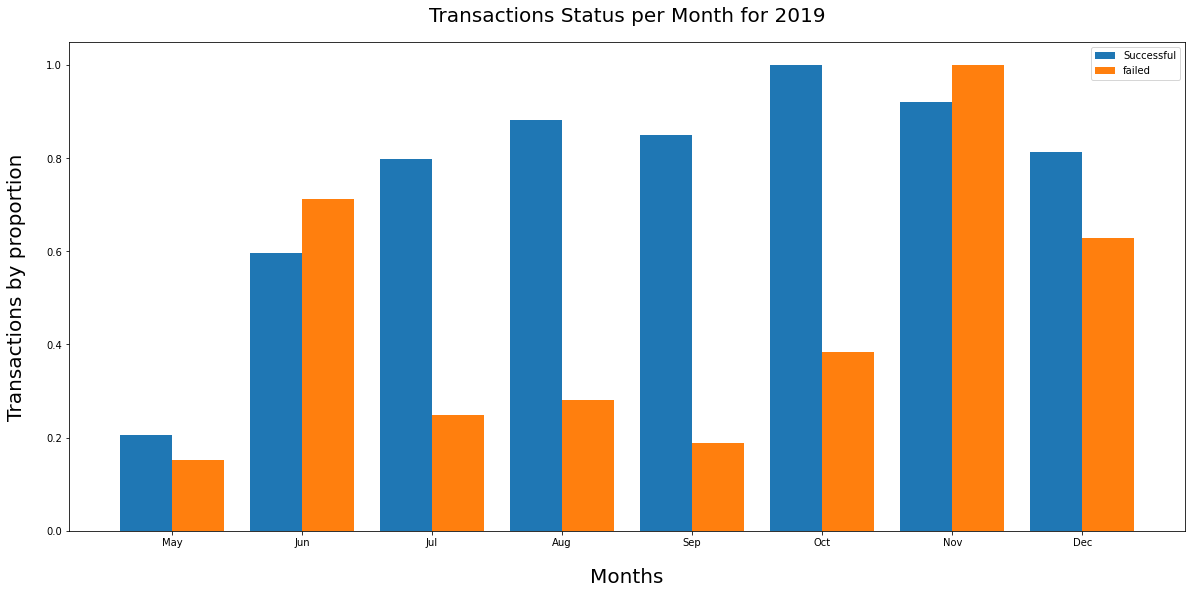

In [35]:
w = 0.4
bar1 = np.arange(len(new_dummy_df_19['Month']))
bar2 = [i + w for i in bar1]

plt.figure(figsize = (20, 9))
plt.bar(bar1, new_dummy_df_19['successful'], w, label = 'Successful')
plt.bar(bar2, new_dummy_df_19['failed'], w, label = 'failed')
plt.title("Transactions Status per Month for 2019", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Transactions by proportion" , labelpad = 20, size = 20)
plt.xticks(bar1 + w/2, new_dummy_df_19['Month'])
plt.legend(loc = 'best')
plt.show()

In [36]:
status_df_19['Week'] = status_df_19['Date'].dt.week

status_df_19_failed = status_df_19.loc[df['status'] == 'failed']

df_19_failed_txn = status_df_19_failed[['Week', 'no of txns']].groupby('Week').sum()

df_19_failed_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

df_19_failed_txn.reset_index(inplace = True)

df_19_failed_txn.rename(columns = {'no of txns': 'Sum of failed Transaction', 'Week': 'Week of the year'}, inplace = True)

## Sum of Failed Transaction per week in the Year 2019

In [37]:
df_19_failed_txn

,Week of the year,Sum of failed Transaction
0,46,2746
1,23,1660
2,50,1445
3,26,1429
4,45,1340
5,48,1225
6,47,1209
7,49,1052
8,51,916
9,25,898


# Investigating 'Successful' and 'Failed' Transaction Status 2020

In [38]:
status_count_20 = df_20['status'].value_counts().to_frame()
status_count_20['status_percentage'] = status_count_20['status'].apply(lambda x : (x/sum(status_count_20['status'].values)*100))
status_count_20.rename(columns = {'status': 'status_count'}, inplace = True)
status_count_20

,status_count,status_percentage
successful,341077,94.307700
failed,13015,3.598644
declined,6792,1.877986
initialized,751,0.207651
pending,22,0.006083
debited,7,0.001935


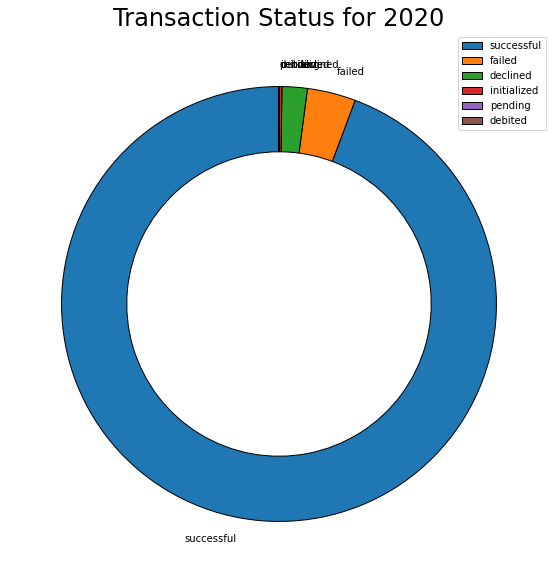

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1.0}
ax.pie(status_count_20['status_percentage'], wedgeprops=wedgeprops, startangle=90, labels = status_count_20.index)
plt.legend(loc = 'best')
plt.title('Transaction Status for 2020', fontsize=24, loc='center')
plt.show()

In [40]:
status_df_20 = df_20.loc[df_20['status'].isin(['successful', 'failed'])]

In [41]:
dummy_df_20 = pd.get_dummies(status_df_20['status'])
dummy_df_20 = pd.concat([status_df_20, dummy_df_20], axis = 1)
new_dummy_df_20 = dummy_df_20[['Date', 'failed', 'successful']].groupby(dummy_df_20['Date'].dt.strftime('%b')).sum() 
new_dummy_df_20.reset_index(inplace = True)
new_dummy_df_20['Month'] = new_dummy_df_20['Date'].apply(lambda x: dt.strptime(x, '%b'))

new_dummy_df_20.sort_values(by = 'Month', inplace = True)
new_dummy_df_20['Month'] = pd.to_datetime(new_dummy_df_20['Month'])

new_dummy_df_20.drop('Date', inplace = True, axis = 1)
new_dummy_df_20['Month'] = new_dummy_df_20['Month'].apply(lambda x : x.strftime("%b"))

In [42]:
new_dummy_df_20

,failed,successful,Month
3,979.0,17396.0,Jan
2,709.0,17728.0,Feb
6,885.0,18917.0,Mar
0,624.0,16513.0,Apr
7,830.0,24898.0,May
5,947.0,28904.0,Jun
4,1158.0,37597.0,Jul
1,723.0,25466.0,Aug
10,3092.0,65020.0,Sep
9,2731.0,75606.0,Oct


In [43]:
# data normalization
new_dummy_df_20['successful'] = new_dummy_df_20['successful']/ new_dummy_df_20['successful'].max()
new_dummy_df_20['failed'] = new_dummy_df_20['failed']/new_dummy_df_20['failed'].max()

In [44]:
new_dummy_df_20

,failed,successful,Month
3,0.316624,0.230088,Jan
2,0.229301,0.234479,Feb
6,0.286223,0.250205,Mar
0,0.201811,0.218409,Apr
7,0.268435,0.329312,May
5,0.306274,0.382298,Jun
4,0.374515,0.497275,Jul
1,0.233829,0.336825,Aug
10,1.000000,0.859985,Sep
9,0.883247,1.000000,Oct


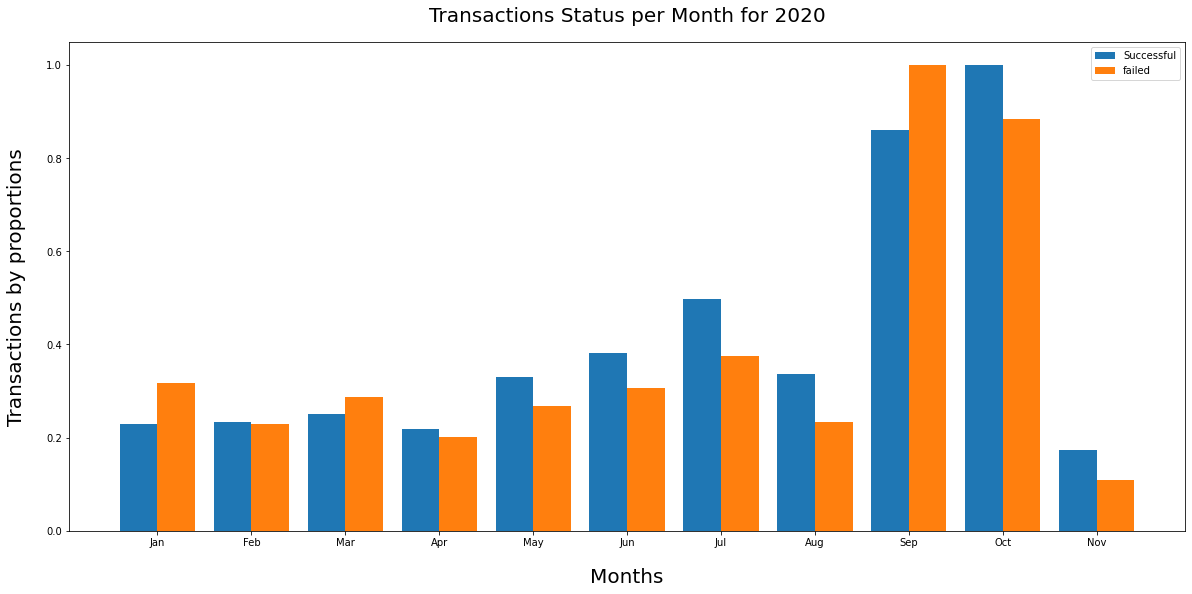

In [45]:
w = 0.4
bar3 = np.arange(len(new_dummy_df_20['Month']))
bar4 = [i + w for i in bar3]

plt.figure(figsize = (20, 9))
plt.bar(bar3, new_dummy_df_20['successful'], w, label = 'Successful')
plt.bar(bar4, new_dummy_df_20['failed'], w, label = 'failed')
plt.title("Transactions Status per Month for 2020", pad = 20, fontsize = 20)
plt.xlabel("Months", labelpad = 20, size = 20)
plt.ylabel("Transactions by proportions" , labelpad = 20, size = 20)
plt.xticks(bar3 + w/2, new_dummy_df_20['Month'])
plt.legend(loc = 'best')
plt.show()

In [46]:
status_df_20['Week'] = status_df_20['Date'].dt.week

status_df_20_failed = status_df_20.loc[df['status'] == 'failed']

df_20_failed_txn = status_df_20_failed[['Week', 'no of txns']].groupby('Week').sum()

df_20_failed_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

df_20_failed_txn.reset_index(inplace = True)

df_20_failed_txn.rename(columns = {'no of txns': 'Sum of failed Transaction', 'Week': 'Week of the year'}, inplace = True)

### Investigating September and October 2020

In [47]:
sep_oct = status_df_20.loc[status_df_20['Week'].isin([36, 37, 38, 39, 40, 41, 42, 43, 44])]
sep_oct['no of txns'] = sep_oct['no of txns'] / sep_oct['no of txns'].max()

<AxesSubplot:xlabel='no of txns', ylabel='status'>

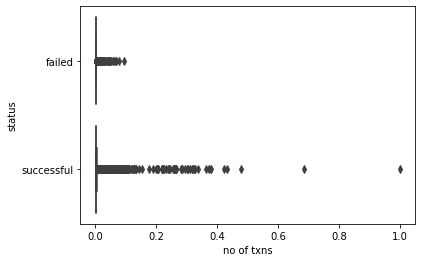

In [48]:
sns.boxplot(x = sep_oct['no of txns'], y = sep_oct['status'], orient= 'h')

> *The successful status category has extreme values(outliers).*

In [49]:
sep_oct[(sep_oct['status'] == 'successful') & (sep_oct['no of txns'] > 0.4)]

,acct_no,status,no of txns,Date,Week
187800,4203382q,successful,0.686149,2020-09-14,38
187803,4203382q,successful,1.000000,2020-09-15,38
187857,4203382q,successful,0.477182,2020-10-04,40
187871,4203382q,successful,0.433947,2020-10-08,41
187875,4203382q,successful,0.422738,2020-10-09,41


In [50]:
status_df_20.loc[status_df_20.index.isin([187800,187803,187857,187875])]

,acct_no,status,no of txns,Date,Week
187800,4203382q,successful,857,2020-09-14,38
187803,4203382q,successful,1249,2020-09-15,38
187857,4203382q,successful,596,2020-10-04,40
187875,4203382q,successful,528,2020-10-09,41


>**September (2020) and October (2020) had an abnormal increase in transactions compared to other months because of an abnormal amount of transactions carried out by a certain account no 4203382q between week 38 to week 41**


## Sum of Failed Transaction per week in the Year 2020

In [51]:
df_20_failed_txn

,Week of the year,Sum of failed Transaction
0,41,2491
1,38,2144
2,36,1569
3,40,1390
4,37,1064
5,42,867
6,39,748
7,20,533
8,29,495
9,15,495


## Accounts with the most transactions for 2019

In [52]:
df_19_acct_no_txn = df_19[['acct_no', 'no of txns']].groupby('acct_no').sum()

df_19_acct_no_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

top_10_acct_no_2019 = df_19_acct_no_txn.head(20)


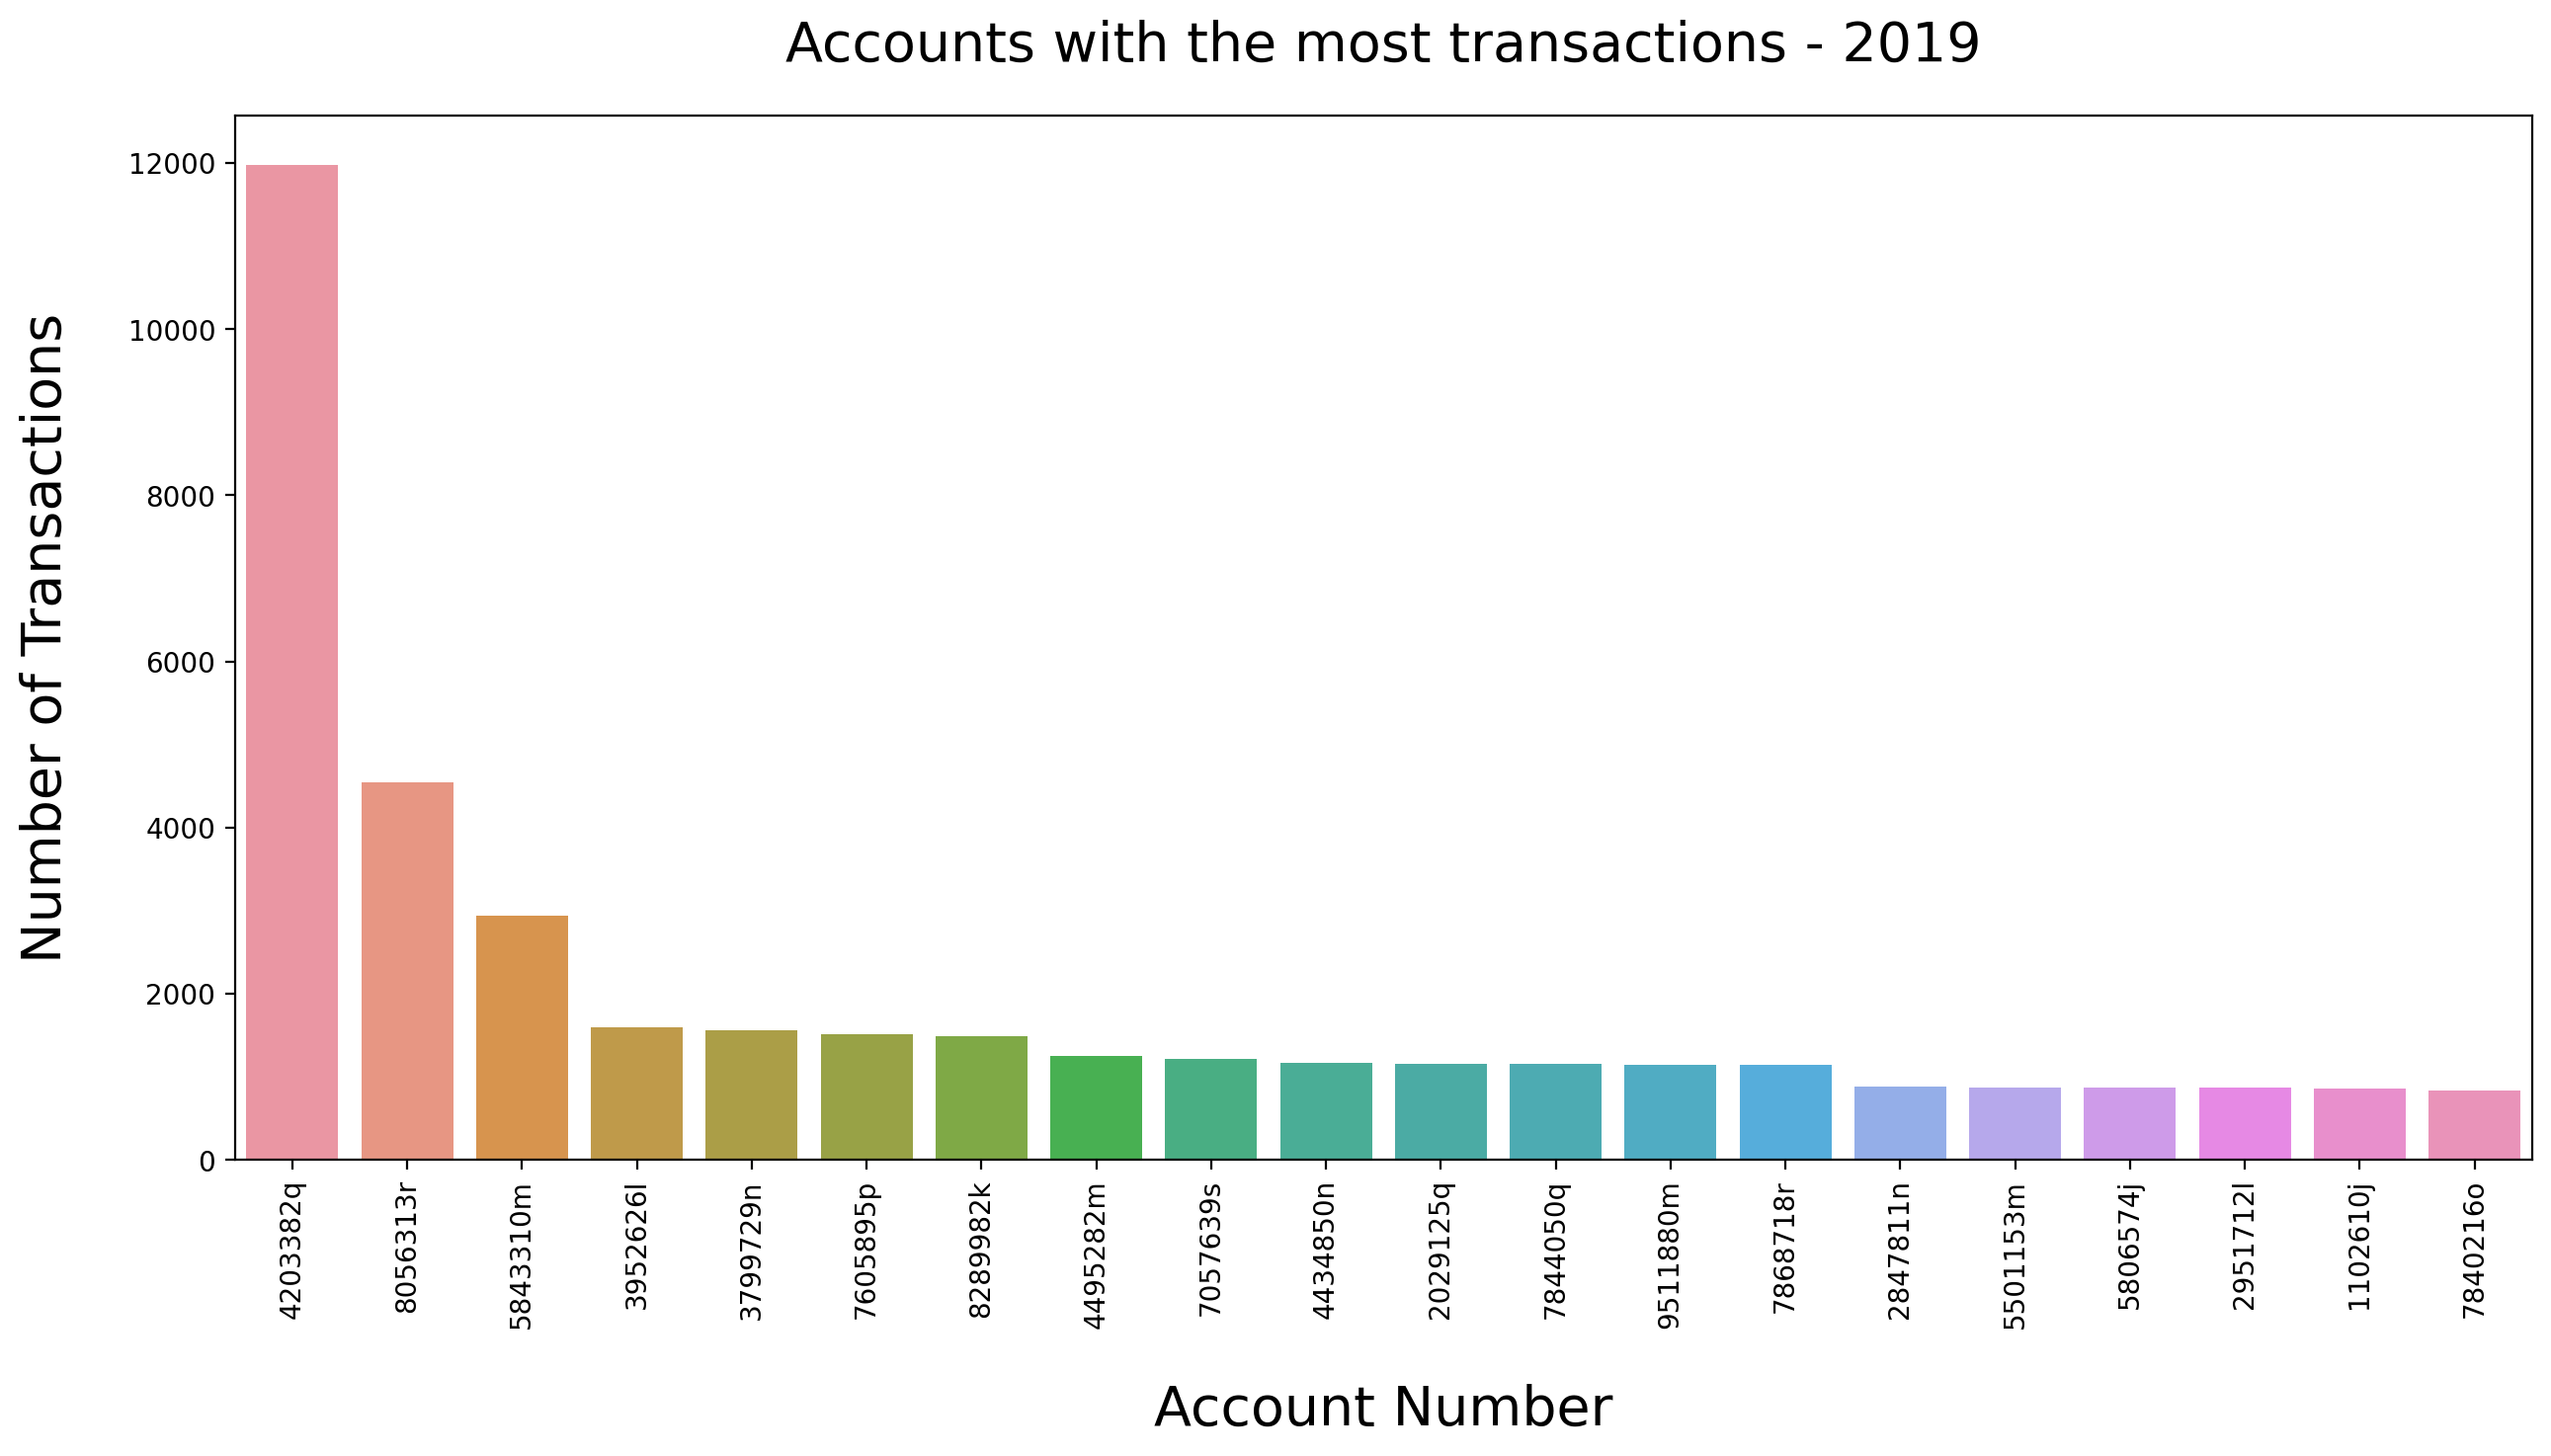

In [53]:
plt.figure(figsize = (15,7), dpi = 200)
sns.barplot(x =top_10_acct_no_2019.index, y = top_10_acct_no_2019['no of txns'])
plt.title("Accounts with the most transactions - 2019", pad = 20, fontsize = 20)
plt.xlabel("Account Number", labelpad = 20, size = 20)
plt.ylabel("Number of Transactions" , labelpad = 20, size = 20)
plt.xticks(rotation = 90)
plt.show()

## Accounts with the most transactions for 2020

In [54]:
df_20_acct_no_txn = df_20[['acct_no', 'no of txns']].groupby('acct_no').sum()

df_20_acct_no_txn.sort_values(by = 'no of txns', ascending = False, inplace = True)

top_10_acct_no_2020 = df_20_acct_no_txn.head(20)

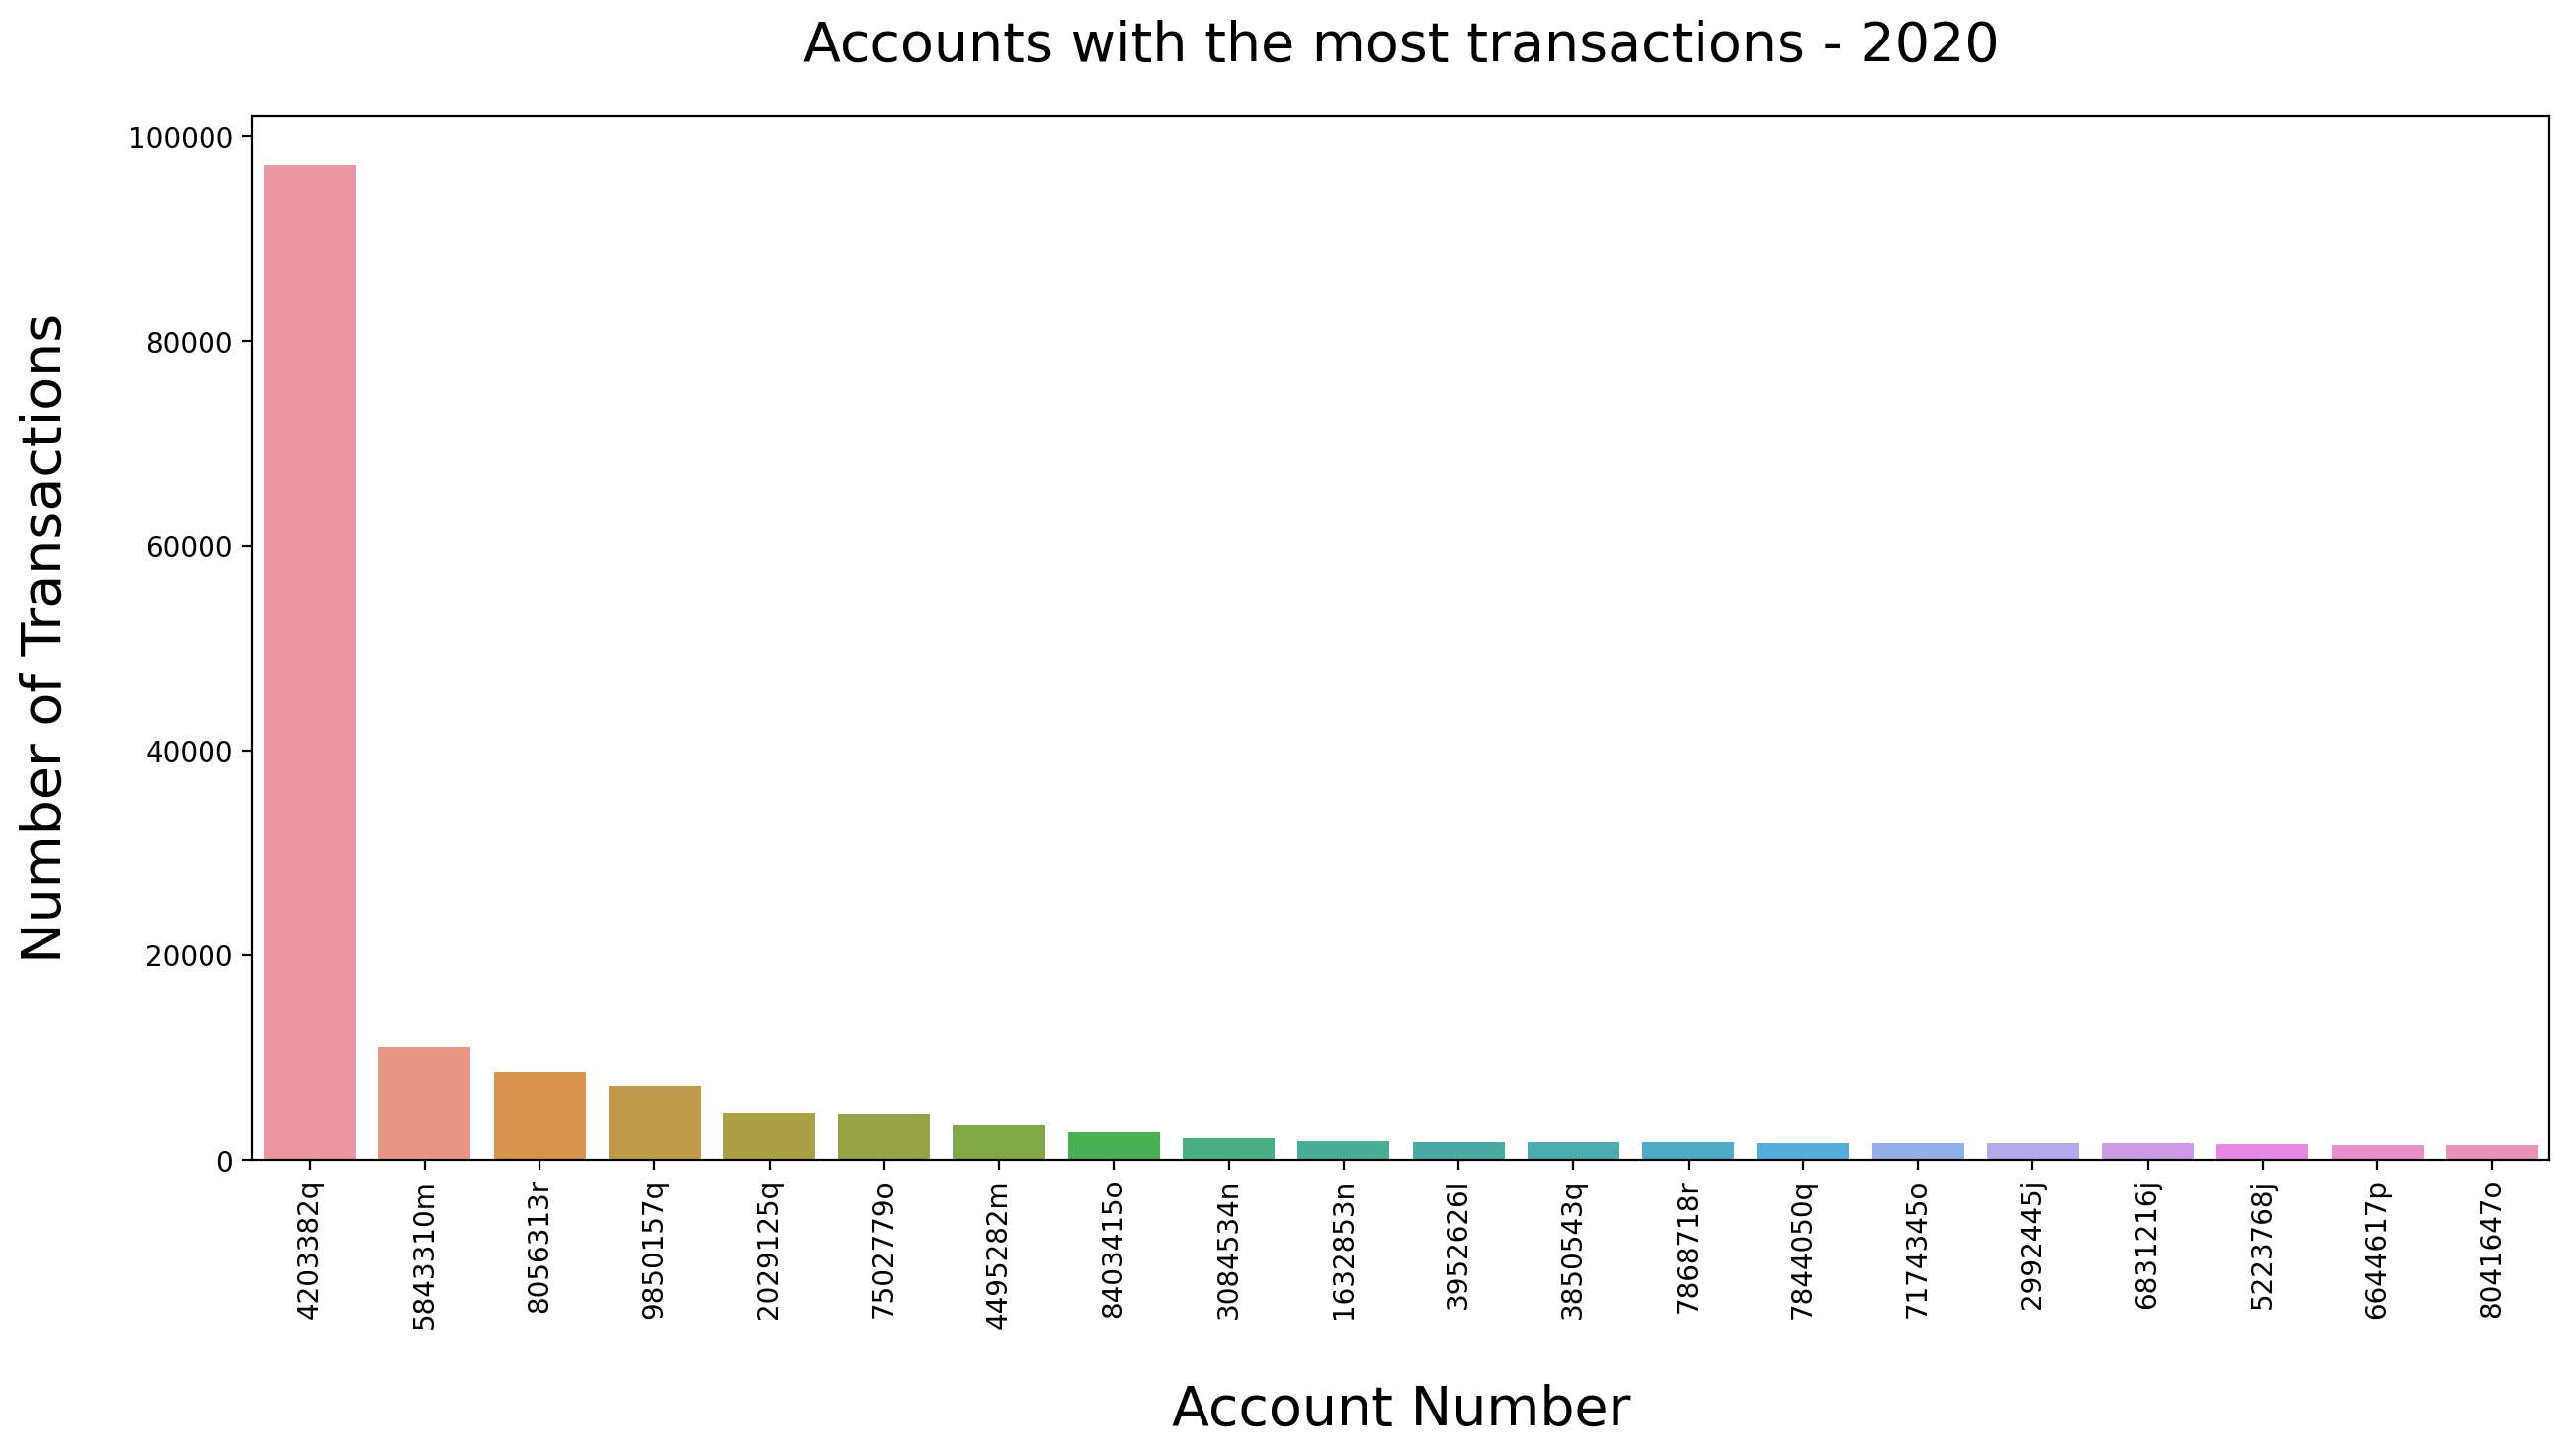

In [55]:
plt.figure(figsize = (15,7), dpi = 200)
sns.barplot(x =top_10_acct_no_2020.index, y = top_10_acct_no_2020['no of txns'])
plt.title("Accounts with the most transactions - 2020", pad = 20, fontsize = 20)
plt.xlabel("Account Number", labelpad = 20, size = 20)
plt.ylabel("Number of Transactions" , labelpad = 20, size = 20)
plt.xticks(rotation = 90)
plt.show()

# Accounts with the most Transcations for 2019 and 2020

In [56]:
acct_txns_19_20 = pd.merge(top_10_acct_no_2020, top_10_acct_no_2019, how = 'inner',on = 'acct_no' )

acct_txns_19_20.rename(columns = {"no of txns_x":"Transactions 2020", "no of txns_y":"Transactions 2019" }, inplace = True)

acct_txns_19_20

,Transactions 2020,Transactions 2019
acct_no,,
4203382q,97184,11971
5843310m,11023,2934
8056313r,8614,4550
2029125q,4597,1152
4495282m,3438,1251
3952626l,1716,1595
7868718r,1707,1143
7844050q,1669,1152


In [57]:
# Data Normalization - Simple feature scaling
acct_txns_19_20['Transactions 2020'] = acct_txns_19_20['Transactions 2020']/acct_txns_19_20['Transactions 2020'].max()
acct_txns_19_20['Transactions 2019'] = acct_txns_19_20['Transactions 2019']/acct_txns_19_20['Transactions 2019'].max()

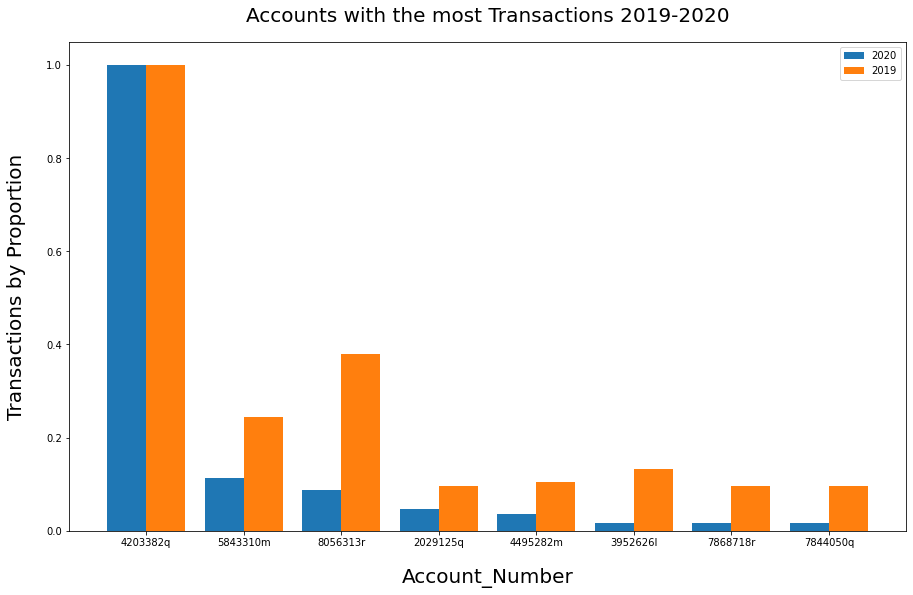

In [58]:
w = 0.4
bar5 = np.arange(len(acct_txns_19_20))
bar6 = [i + w for i in bar5]

plt.figure(figsize = (15, 9))
plt.bar(bar5, acct_txns_19_20['Transactions 2020'], w, label = '2020')
plt.bar(bar6, acct_txns_19_20['Transactions 2019'], w, label = '2019')
plt.title("Accounts with the most Transactions 2019-2020", pad = 20, fontsize = 20)
plt.xlabel("Account_Number", labelpad = 20, size = 20)
plt.ylabel("Transactions by Proportion" , labelpad = 20, size = 20)
plt.xticks(bar5 + w/2, acct_txns_19_20.index)
plt.legend(loc = 'best')
plt.show()

# Machine Learning

I wish to devlop a model that can estimate transaction status with the available relevant features in the data set

### Dropped the acct_no and txnYear feature
I dropped the acct_no feature because its alpha-numeric values won't be relevant in the machine learning algorithm. I also dropped the txnYear feature because the variable won't also be applicable in predicting the future status of a transaction.

In [59]:
ml_df = df.drop(labels = ['acct_no', 'txnYear'], axis= 1)

*I only want my model to estimate between successful and failed status hence the filter below*

In [60]:
##explain the reason for this filter
ml_df = ml_df.loc[ml_df['status'].isin(['successful', 'failed'])]
ml_df

,txnMonth,txnDay,status,no of txns
0,10,29,successful,1
1,11,12,failed,2
2,11,18,failed,1
3,11,27,successful,1
4,12,8,failed,1
...,...,...,...,...
513242,10,15,successful,2
513243,10,16,successful,1
513244,10,21,successful,2
513245,10,23,successful,2


In [61]:
ml_df['no of txns'].unique()

array([   1,    2,    3,    5,    4,    7,    9,    6,    8,   10,   11,
         14,   15,   12,   13,   23,   21,   22,   16,   27,   18,   25,
         17,   69,   20,   24,   19,   67,   39,   54,   42,   41,   73,
         28,   32,   40,   76,   71,   44,   31,   49,   30,   81,   35,
         98,  117,   86,   29,   45,   38,   61,   58,   33,   26,   55,
         59,   74,   72,   70,   77,   36,   51,   43,   88,   53,   68,
         46,   37,   34,   48,   62,   94,   50,   60,   65,   79,   75,
         56,   63,   57,   78,   91,   64,   83,   52,   99,   66,   87,
         80,   47,   90,   84,  111,  102,  101,   97,   93,   92,  125,
         82,  108,  113,  160,  132,  200,  267,  130,  100,  112,   89,
        319,  539,  488,  550,  515,  468,  466,  517,  385,  496,  538,
        336,  544,  580,  513,  473,  420,  536,  593,  552,  607,  665,
        391,  559,  640,  374,  571,  186,  526,  584,  453,  524,  511,
        594,  540,  482,  465,  541,  546,  151,  4

>*I will convert the distribution for the 'no of txns' feature to a standard normal distribution by using the Z-Score.*

### Standard Normal Distribution (z)

In [62]:
from scipy import stats as st

In [63]:
n_ml_df = ml_df.copy()

In [64]:
n_ml_df['no of txns'] = st.zscore(n_ml_df['no of txns'], axis = 0, ddof = 0)

In [65]:
n_ml_df

,txnMonth,txnDay,status,no of txns
0,10,29,successful,-0.150268
1,11,12,failed,-0.045720
2,11,18,failed,-0.150268
3,11,27,successful,-0.150268
4,12,8,failed,-0.150268
...,...,...,...,...
513242,10,15,successful,-0.045720
513243,10,16,successful,-0.150268
513244,10,21,successful,-0.045720
513245,10,23,successful,-0.045720


Text(0.5, 1.0, 'Transaction status distributions')

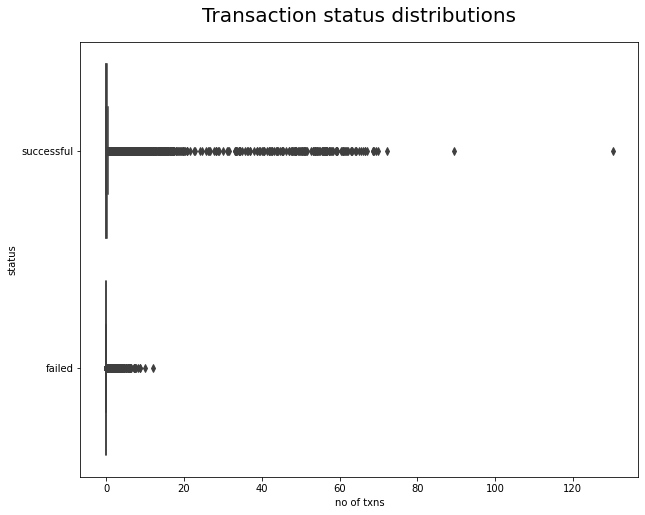

In [66]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = n_ml_df['no of txns'], y = n_ml_df['status'], orient = 'h')
plt.title("Transaction status distributions", pad = 20, fontsize = 20)

### Remove Outliers

The successful category has 2 data point that are extreme(outliers) 

In [67]:
n_ml_df[(n_ml_df['status'] == 'successful') & (n_ml_df['no of txns'] > 80)]

,txnMonth,txnDay,status,no of txns
187800,9,14,successful,89.342537
187803,9,15,successful,130.325223


In [68]:
n_ml_df.drop(index = [187800,187803], axis= 0, inplace= True)

Text(0.5, 1.0, 'Transaction status distributions')

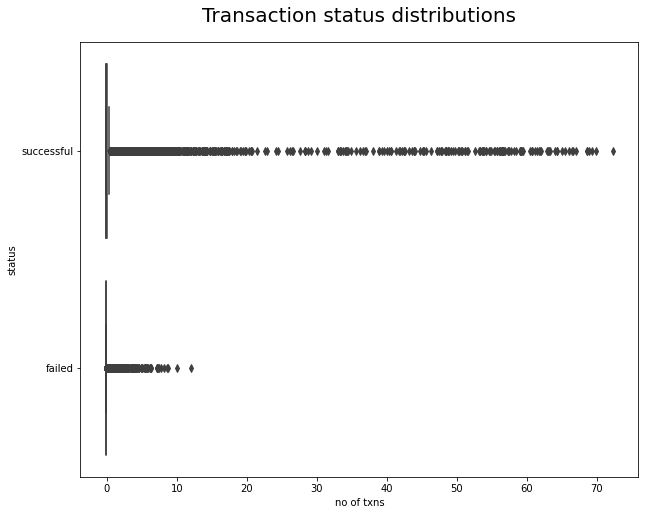

In [69]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = n_ml_df['no of txns'], y = n_ml_df['status'], orient = 'h')
plt.title("Transaction status distributions", pad = 20, fontsize = 20)

In [70]:
ml_df.drop(index = [187800,187803], axis= 0, inplace= True)

In [71]:
ml_df['txnMonth'] = ml_df['txnMonth'].astype('float64')
ml_df['txnDay'] = ml_df['txnDay'].astype('float64')
ml_df['no of txns'] = ml_df['no of txns'].astype('int64')

>Converted the predictor features to floats, because most machine learning algorithms work with floats and intergers 

### Target Variable Encoded

In [72]:
ml_status_dummy = pd.get_dummies(ml_df['status'], drop_first= True)

In [73]:
ml_df.drop('status', axis= 1, inplace= True)

In [74]:
new_ml_df = pd.concat([ml_df, ml_status_dummy], axis = 1)

In [75]:
new_ml_df.rename(columns={'successful': 'status'}, inplace= True)

In [76]:
new_ml_df

,txnMonth,txnDay,no of txns,status
0,10.0,29.0,1,1
1,11.0,12.0,2,0
2,11.0,18.0,1,0
3,11.0,27.0,1,1
4,12.0,8.0,1,0
...,...,...,...,...
513242,10.0,15.0,2,1
513243,10.0,16.0,1,1
513244,10.0,21.0,2,1
513245,10.0,23.0,2,1


## Check for Correlation

In [77]:
new_ml_df.corr()['status']

txnMonth     -0.043253
txnDay        0.025944
no of txns    0.021596
status        1.000000
Name: status, dtype: float64

<AxesSubplot:>

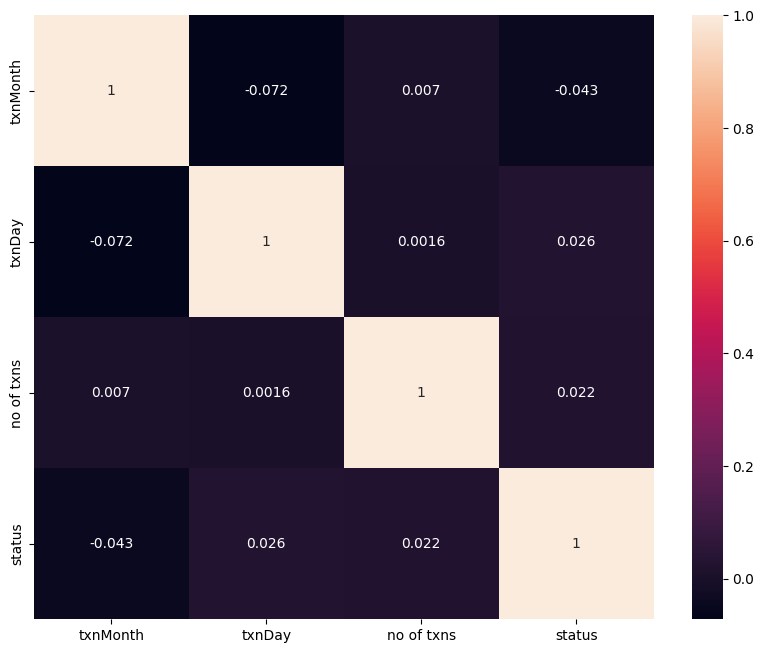

In [78]:
plt.figure(figsize=(10, 8), dpi = 100)
sns.heatmap(new_ml_df.corr(), annot= True)

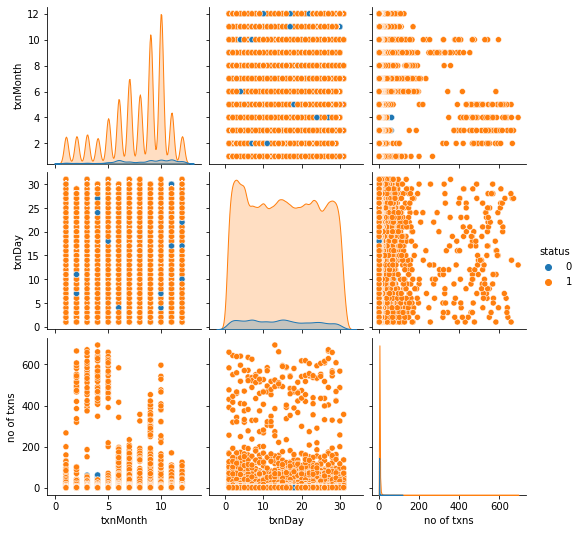

In [79]:
sns.pairplot(new_ml_df, hue = 'status' )

### Train|Test Split and Scaling

In [80]:
new_ml_df

,txnMonth,txnDay,no of txns,status
0,10.0,29.0,1,1
1,11.0,12.0,2,0
2,11.0,18.0,1,0
3,11.0,27.0,1,1
4,12.0,8.0,1,0
...,...,...,...,...
513242,10.0,15.0,2,1
513243,10.0,16.0,1,1
513244,10.0,21.0,2,1
513245,10.0,23.0,2,1


In [81]:
X = new_ml_df.drop('status', axis= 1)
y = new_ml_df['status']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [84]:
scaler = StandardScaler()

In [85]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [87]:
# help(LogisticRegression)

In [88]:
log_model = LogisticRegression(solver='liblinear')

In [89]:
param_grid = [
    { 'penalty' : ['l1', 'l2'],
        'C': np.logspace(-4, 4, 20),
     'max_iter': [100, 1000, 2500, 5000]
    }
]

In [102]:
# help(GridSearchCV)

In [90]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, scoring='f1')

In [91]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2']}],
             scoring='f1')

In [92]:
grid_model.best_estimator_.get_params()

{'C': 0.0001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Model Performance Evaluation 

In [93]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve

In [94]:
y_pred = grid_model.predict(scaled_X_test)

In [95]:
confusion_matrix(y_test,y_pred)

array([[    0,  2767],
       [    0, 47402]])

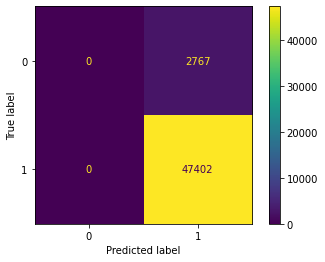

In [96]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2767
           1       0.94      1.00      0.97     47402

    accuracy                           0.94     50169
   macro avg       0.47      0.50      0.49     50169
weighted avg       0.89      0.94      0.92     50169



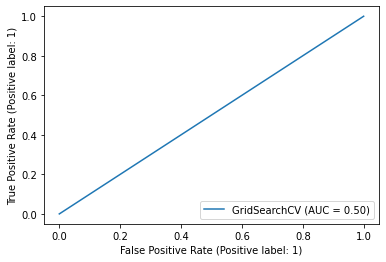

In [98]:
plot_roc_curve(grid_model, scaled_X_test, y_test)

# Conclusion 

### I couldn't go further with the machine learning process<br>
- My model performance metrics are poor as it couldn't predict any relevant case ("failed" status).
- If I'm to use this model, I will need more predictor variables that relate with the target variable for example the amount, location, mode of transaction, type of account, state, e.t.c
- Using another model might be another option. Maybe Time series forecasting might be the best option considering the predictor variables in this dataset.